## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('data/stud.csv')
X=df.drop(columns=['math_score'], axis=1)
y=df['math_score']

In [6]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X=preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2_sq=r2_score(true, predicted)
    return mae, mse, rmse, r2_sq

In [18]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [32]:
model_list=[]
r2_lt=[]

In [33]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    print(list(models.keys())[i])
    print('Model performance for Training set')
    mae, mse, rmse, r2_square=evaluate_model(y_train, y_train_pred)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2 square: ", r2_square)
    print()
    print('Model performance for Test set')
    mae, mse, rmse, r2_square=evaluate_model(y_test, y_test_pred)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2 square: ", r2_square)
    print()
    print()
    model_list.append(list(models.keys())[i])
    r2_lt.append(r2_square)

Linear Regression
Model performance for Training set
MAE:  4.267109375
MSE:  28.348541259765625
RMSE:  5.32433481852575
R2 square:  0.8742565651513869

Model performance for Test set
MAE:  4.2158203125
MSE:  29.116678771972655
RMSE:  5.3959872842671395
R2 square:  0.8803449074540941


Lasso
Model performance for Training set
MAE:  5.206302661246526
MSE:  43.47840400585579
RMSE:  6.593815587795566
R2 square:  0.8071462015863456

Model performance for Test set
MAE:  5.157881810347763
MSE:  42.5064168384116
RMSE:  6.519694535667419
R2 square:  0.8253197323627853


Ridge
Model performance for Training set
MAE:  4.264987823725981
MSE:  28.33778823308244
RMSE:  5.323324922741654
R2 square:  0.8743042615212909

Model performance for Test set
MAE:  4.211100688014261
MSE:  29.056272192348324
RMSE:  5.390387016935642
R2 square:  0.8805931485028737


K-Neighbors Regressor
Model performance for Training set
MAE:  4.516749999999999
MSE:  32.57765
RMSE:  5.707683417990174
R2 square:  0.8554978341651

In [34]:
r2_lt

[np.float64(0.8803449074540941),
 np.float64(0.8253197323627853),
 np.float64(0.8805931485028737),
 np.float64(0.7838129945787431),
 np.float64(0.7404026655883329),
 np.float64(0.8494272052215208),
 np.float64(0.8277965653186071),
 np.float64(0.8516318920747058),
 np.float64(0.8594849620887633)]

In [36]:
pd.DataFrame(list(zip(model_list, r2_lt)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
8,AdaBoost Regressor,0.859485
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849427
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.740403


In [38]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


Text(0, 0.5, 'Predicted')

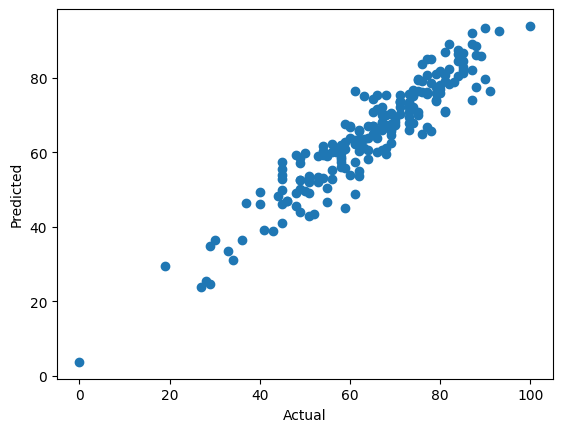

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

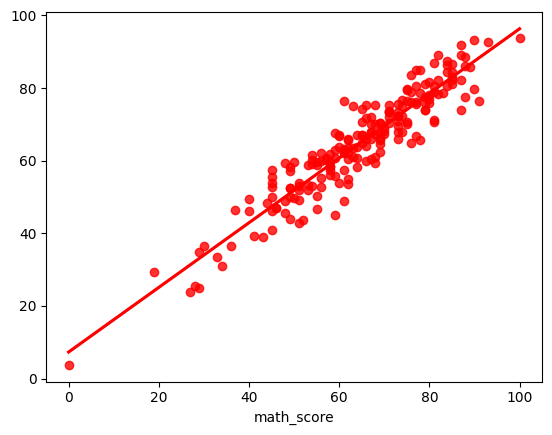

In [40]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red');

In [41]:
pred_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
